# Diabetes Prediction

In [62]:
# First of all we import all the import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
# After libraries we will import the dataset from the url

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# Create a dataframe of the data
df = pd.read_csv(url)


In [64]:
# cheacking the head of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# Checking the shape of the dataframe
df.shape

(768, 9)

In [66]:
# Now we will check is there is any empty values in the dataset if yes we will impute it
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There is no empty values in the dataset so we are good to go

In [67]:
# Checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
# Checking some more information about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
# Checking the name of columns in the dataframe
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
# Checking the samples of the dataframe
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
17,7,107,74,0,0,29.6,0.254,31,1
630,7,114,64,0,0,27.4,0.732,34,1
394,4,158,78,0,0,32.9,0.803,31,1
129,0,105,84,0,0,27.9,0.741,62,1


- There is some zero values in some columns like skinthickness we will fill up with its median or mean according to the sitution

In [71]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [72]:
columns = ['Glucose' , 'BloodPressure', 'SkinThickness', 'Insulin' , 'BMI']
for col in columns:
    df[col] = df[col].replace(0 , df[col].median())

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


## Now we will seprate the train and test data and predicit column 

In [74]:
X = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [75]:
# Splitting the data in to train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

### LOGISTIC REGRESSION

In [76]:
# Now making the objects of model and train
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))

Logistic Regression Accuracy: 0.7727272727272727


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


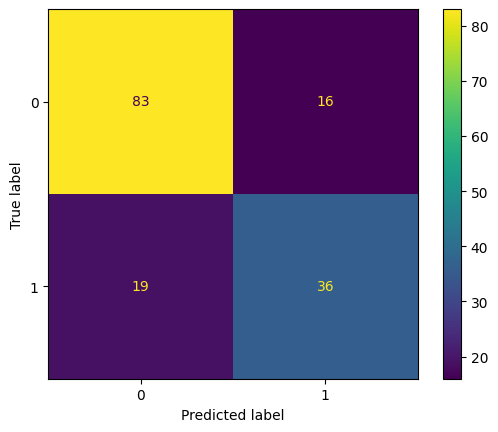

In [77]:
cm = confusion_matrix(y_test , pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### DECISION TREE CLASSIFIER

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred_dtc = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, pred_dtc))

Decision Tree Classifier Accuracy: 0.6948051948051948


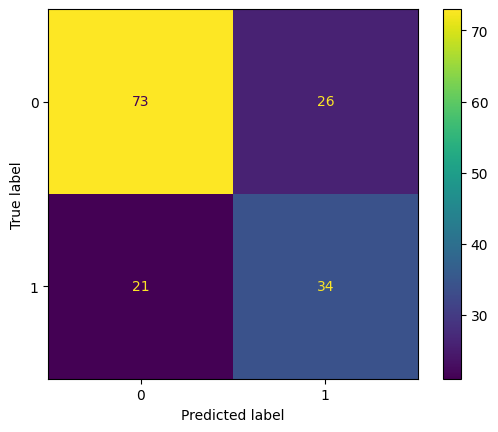

In [79]:
cm = confusion_matrix(y_test , pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### RADNDON FOREST

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
pred_rf = rf.predict(X_test)
print("RandomForestClassifier Accuracy is: " , accuracy_score(y_test , pred_rf))

RandomForestClassifier Accuracy is:  0.7662337662337663


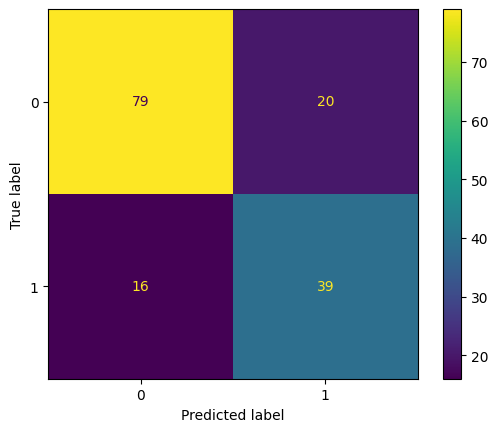

In [81]:
cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


### CONCLUSION

- Logistic Regression gets the good accuracy score of 77%